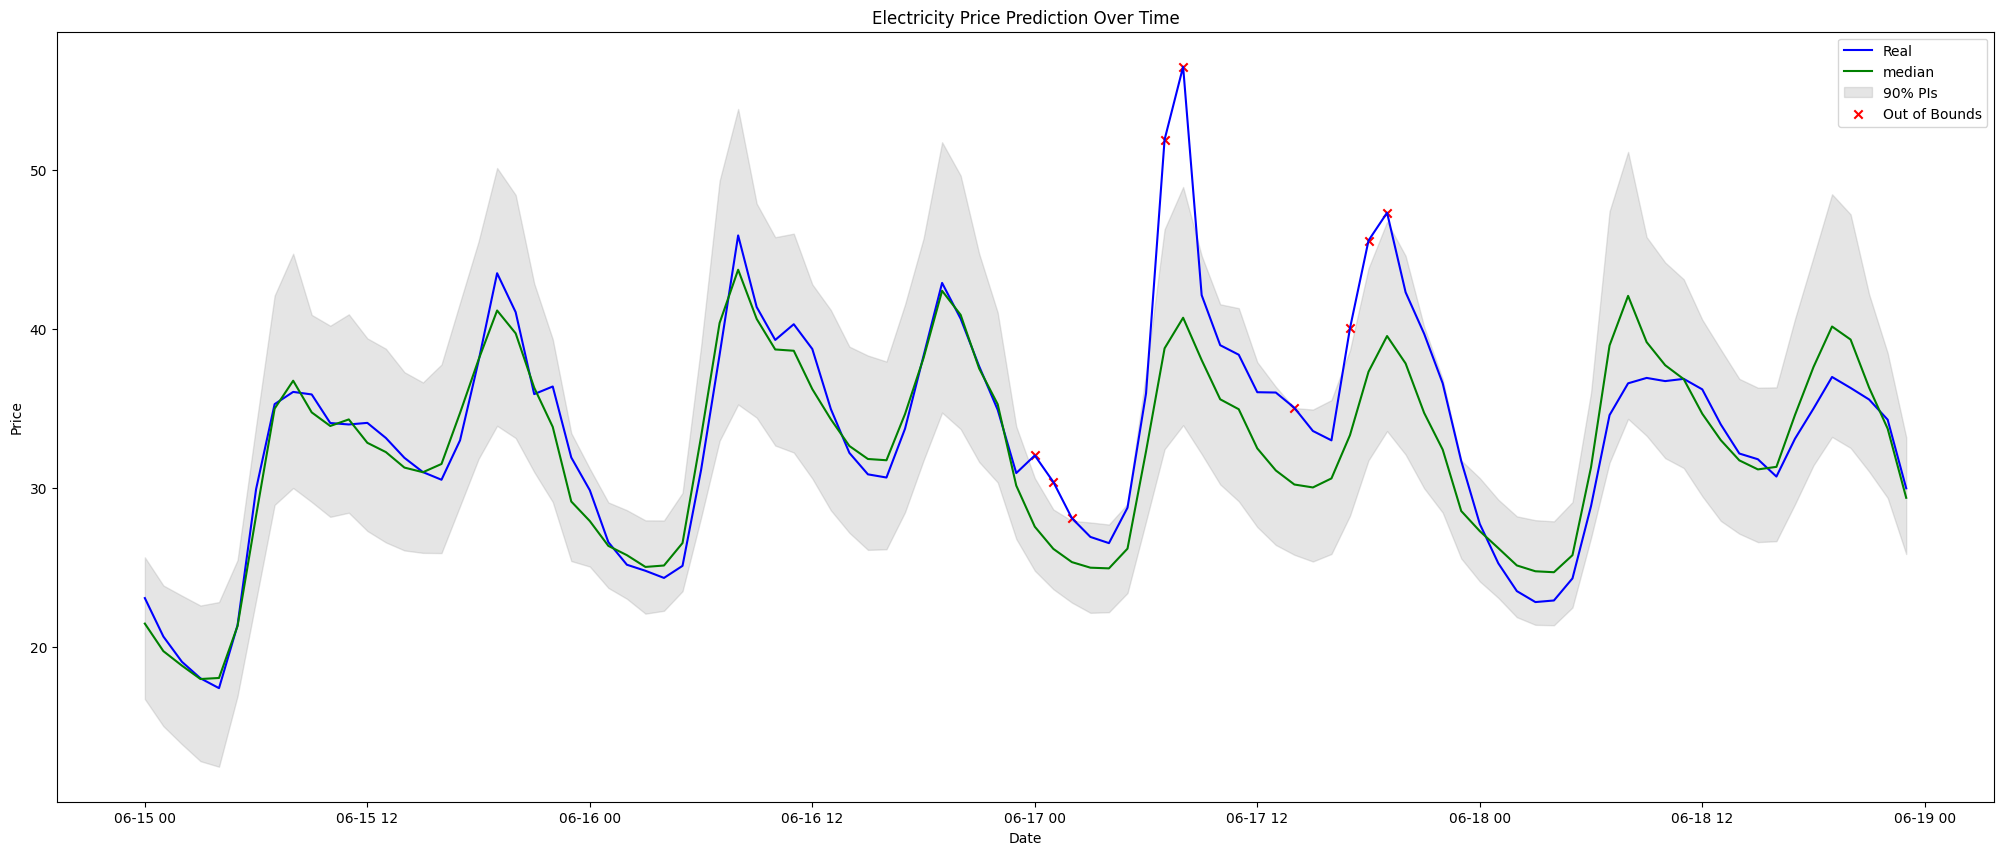

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to the CSV file
csv_file_path = "forecasts_ddnn_2/prediction_ensembled.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file_path, index_col=0)


data = data.iloc[: 24 * 4]

# Convert the index to a DateTime object
data.index = pd.to_datetime(data.index)

# Find the days when the real price is outside the bounds
out_of_bounds_days = data[
    (data["real"] < data["lower_bound_90_ensembled"])
    | (data["real"] > data["upper_bound_90_ensembled"])
]

# Plot the real values, forecast, and 90% Prediction Intervals
plt.figure(figsize=(25, 10))
plt.plot(data["real"], label="Real", color="blue")
plt.plot(data["bound_50_ensembled"], label="median", color="green")
plt.fill_between(
    data.index,
    data["lower_bound_90_ensembled"],
    data["upper_bound_90_ensembled"],
    color="gray",
    alpha=0.2,
    label="90% PIs",
)

# Highlight the out-of-bound days using scatter plot
plt.scatter(
    out_of_bounds_days.index,
    out_of_bounds_days["real"],
    color="red",
    label="Out of Bounds",
    marker="x",
)

plt.title("Electricity Price Prediction Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

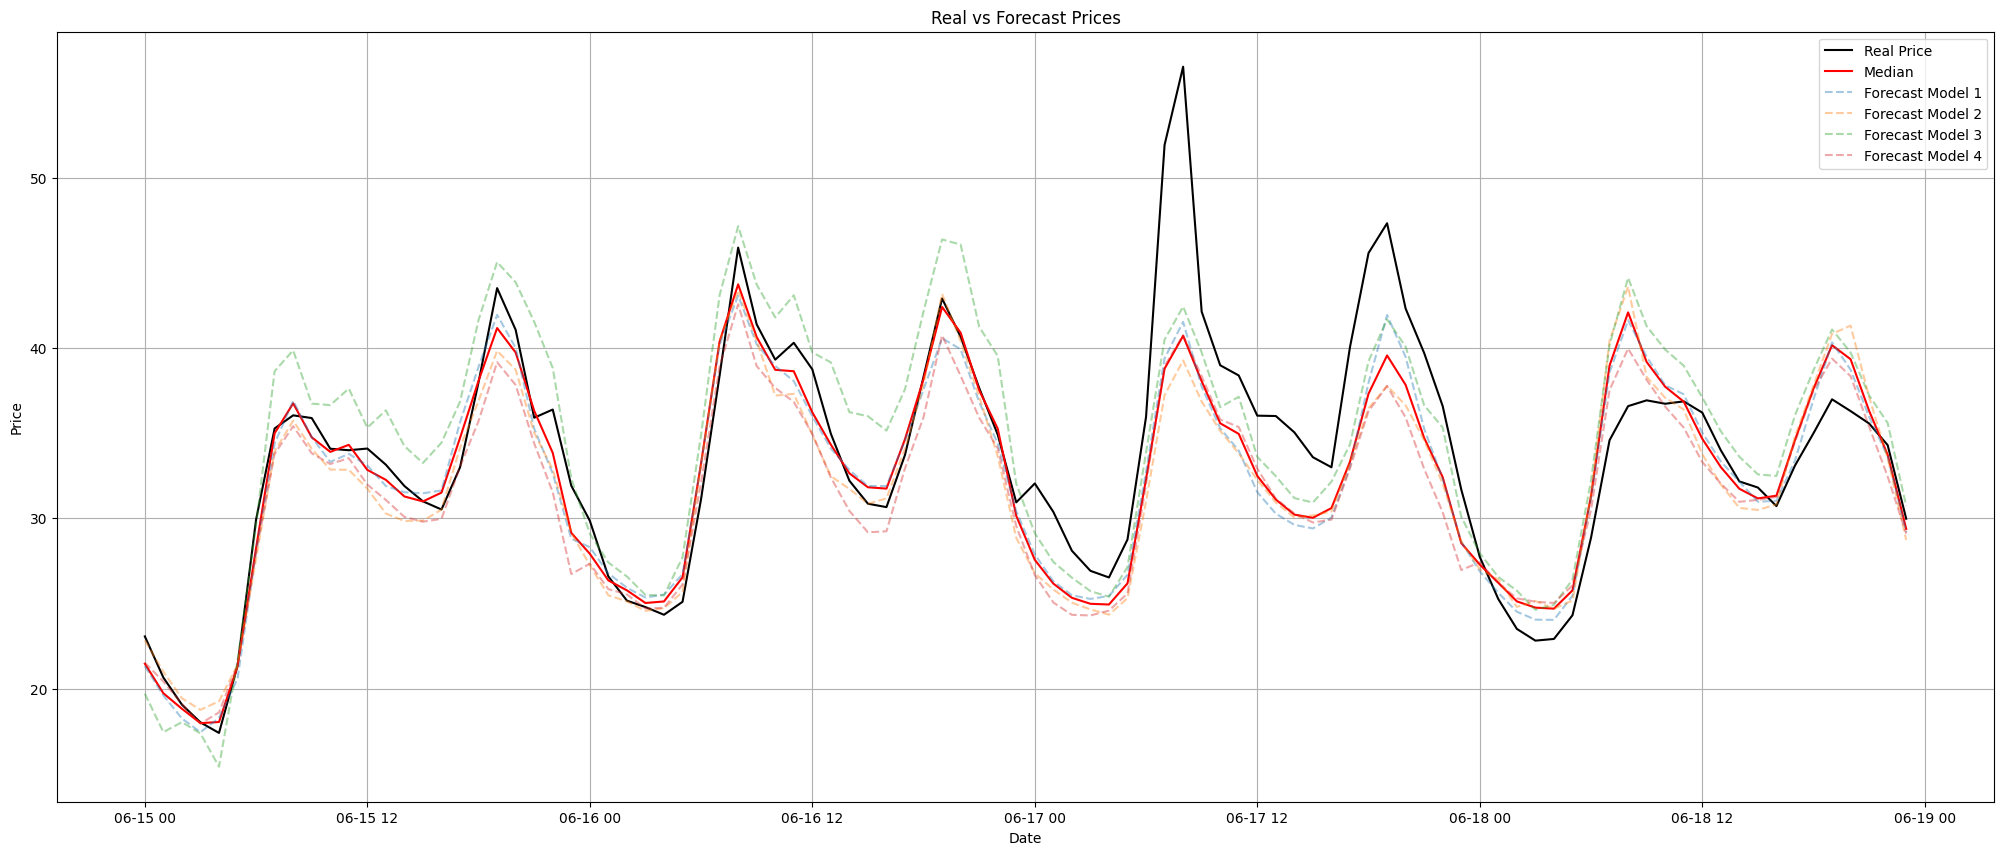

In [4]:
# Plot the real price
plt.figure(figsize=(25, 10))
plt.plot(data['real'], label='Real Price', color='black')
plt.plot(data['bound_50_ensembled'], label='Median', color='red')

# Plot the forecasts
for i in range(1, 5):
    # add transparency to the forecasts
    plt.plot(data[f'forecast_m{i}'], label=f'Forecast Model {i}', linestyle='--' ,alpha=0.4)

# Plot the ensembled forecast
# plt.plot(data['forecast_ensembled'], label='Ensembled Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Real vs Forecast Prices')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Print the days and corresponding values
if not out_of_bounds_days.empty:
    print("Days when the real price is outside the 90% Prediction Intervals:", len(data), len(out_of_bounds_days))
    print(out_of_bounds_days)
else:
    print("The real price is within the 90% Prediction Intervals on all days.")




Days when the real price is outside the 90% Prediction Intervals: 96 9
                      real  forecast_m1  forecast_m2  forecast_m3  \
2020-06-17 00:00:00  32.05    27.888100    26.779551    29.134335   
2020-06-17 01:00:00  30.38    26.304544    25.824516    27.442879   
2020-06-17 02:00:00  28.10    25.485912    25.050928    26.519487   
2020-06-17 07:00:00  51.93    39.395679    37.235825    40.500385   
2020-06-17 08:00:00  56.52    41.536415    39.275440    42.433899   
2020-06-17 14:00:00  35.05    29.618935    30.056578    31.187822   
2020-06-17 17:00:00  40.06    33.033714    33.235268    34.351311   
2020-06-17 18:00:00  45.58    37.970085    36.462177    39.228371   
2020-06-17 19:00:00  47.33    41.941589    37.781666    41.686298   

                     forecast_m4  forecast_ensembled  bound_50_ensembled  \
2020-06-17 00:00:00    26.668825           27.617702           27.564913   
2020-06-17 01:00:00    25.061666           26.158401           26.169960   
2020-06-17